K-Means

import packages

In [199]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


In [200]:
df = pd.read_csv("1632560262896716.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [201]:
df = df.drop(['CustomerID'], axis=1)


In [202]:
df['Gender']=df['Gender'].replace({'Female': 0, 'Male': 1})


C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_1532\2500753375.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Female': 0, 'Male': 1})


In [203]:
df=df.rename(columns={'Annual Income (k$)': 'AI', 'Spending Score (1-100)':'SS'})


In [204]:
df['Gender'].value_counts()


Gender
0    112
1     88
Name: count, dtype: int64

In [205]:
df.value_counts()


Gender  Age  AI  SS
0       18   65  48    1
        19   63  54    1
             65  50    1
        20   16  6     1
             37  75    1
                      ..
1       67   62  59    1
        68   63  43    1
        69   44  46    1
        70   46  56    1
             49  55    1
Name: count, Length: 200, dtype: int64

In [206]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [207]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [208]:
df["Clus_Cus"] = labels


In [209]:
df.groupby('Clus_Cus').mean()
df

,Gender,Age,AI,SS,Clus_Cus
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,1
3,0,23,16,77,1
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,0


In [215]:
kmeans = KMeans(n_clusters = 5)
df['Clus_Cus']=KMeans.fit_predict(X)
pca = PCA(n_components = 3)
df_3d = pca.fit_transform(df[['Gender', 'Age', 'AI', 'SS']])
df['PCA1'] = df_3d[:,0]
df['PCA2'] = df_3d[:,1]
df['PCA3'] = df_3d[:,2]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    cluster_data = df[df['Clus_Cus'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label = f'Cluster {cluster}')

ax.set_title('Clusters Visualized in 3D')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()


TypeError: _BaseKMeans.fit_predict() missing 1 required positional argument: 'X'

Hierarchical

In [211]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline


In [212]:
filename = '1632560262896716.csv'

#Read csv
df2 = pd.read_csv(filename)
#print ("Shape of dataset: ", pdf.shape)

df2.head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [165]:
df2 = df2.drop("CustomerID", axis = 1)
df2.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [166]:
df2['Gender'].replace(['Female', 'Male'], [0, 1], inplace = True)
df2.head()


C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_1532\1414964243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Gender'].replace(['Female', 'Male'], [0, 1], inplace = True)
C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_1532\1414964243.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [167]:
df2['Gender'] = df2['Gender'].astype(np.int64)
df2.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [168]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
feature_x = min_max_scaler.fit_transform(X)
feature_x [0:5]


array([[0.28986685, 0.20667579, 0.741528  ],
       [0.69500859, 0.54417771, 0.93659702],
       [0.72568092, 0.85843971, 0.06089315],
       [0.16637573, 0.73299704, 0.12068344],
       [0.7114091 , 0.77647478, 0.42383883]])

In [169]:
print ("Shape of dataset before cleaning: ", df2.size)
df2 = df2[[ 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].apply(pd.to_numeric, errors='coerce')
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df2.size)
df2.head()


Shape of dataset before cleaning:  800
Shape of dataset after cleaning:  800


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [170]:
print ("Shape of dataset before cleaning: ", df2.shape)
df2[[ 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].apply(pd.to_numeric, errors='coerce')
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df2.shape)
df2.head()


Shape of dataset before cleaning:  (200, 4)
Shape of dataset after cleaning:  (200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [171]:
featureset = df2[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [172]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0: 5]


array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

In [122]:
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D


array([[0.        , 0.43029381, 1.05538015, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 1.25941672, ..., 0.93683095, 1.20748243,
        1.01507247],
       [1.05538015, 1.25941672, 0.        , ..., 1.53221213, 1.43245312,
        1.62419301],
       ...,
       [1.00888686, 0.93683095, 1.53221213, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.43245312, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.62419301, ..., 0.13432353, 0.66437953,
        0.        ]])

In [123]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')


C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_1532\1320718558.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [124]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters


array([20, 20,  1,  7, 10,  7,  1,  7, 14,  7, 14,  7,  2,  7, 16, 20, 10,
       20, 15,  7, 16, 20,  2, 20,  2, 20, 10, 17, 10,  7, 14,  7, 14, 20,
        2,  7, 10,  7, 10,  7,  3, 20, 17,  9, 10,  7, 11,  9,  9,  9, 11,
       17,  9, 15, 11, 17, 11, 15,  9, 15, 15, 21,  3, 11, 15, 21, 11,  3,
       21,  9, 15, 11,  3,  3, 15, 21, 11, 17,  9, 11, 15, 17, 15, 11,  9,
       17, 11,  9, 11, 11,  3, 21, 17, 11,  9, 21, 11,  9, 17, 21,  9, 11,
       15, 21, 17,  9,  3, 15, 15, 15, 15,  9, 11, 21,  9,  9,  3, 11, 11,
       11, 21, 11, 11, 19,  9,  8, 17, 19, 12, 21, 12, 21,  9,  8, 13,  6,
        4, 21, 13,  8,  5, 19,  9,  6, 13, 19, 17,  8,  4, 19, 12, 19,  4,
        8,  4,  6, 12,  8, 12,  8,  3,  6, 13,  6, 12,  8, 12,  6,  4, 21,
       12, 21, 12, 19,  5,  6, 12, 21, 12, 19,  4,  6, 12,  6,  4, 19,  5,
       21,  4,  6,  4,  6, 13,  6,  5,  6,  5, 18, 13, 18], dtype=int32)

In [125]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([5, 5, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 4, 5, 2, 5, 3, 2, 4, 5,
       1, 5, 1, 5, 2, 4, 2, 2, 3, 2, 3, 5, 1, 2, 2, 2, 2, 2, 1, 5, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 4, 2, 3, 2, 3, 3, 5, 1, 2, 3, 5,
       2, 1, 5, 2, 3, 2, 1, 1, 3, 5, 2, 4, 2, 2, 3, 4, 3, 2, 2, 4, 2, 2,
       2, 2, 1, 5, 4, 2, 2, 5, 2, 2, 4, 5, 2, 2, 3, 5, 4, 2, 1, 3, 3, 3,
       3, 2, 2, 5, 2, 2, 1, 2, 2, 2, 5, 2, 2, 5, 2, 2, 4, 5, 3, 5, 3, 5,
       2, 2, 3, 2, 1, 5, 3, 2, 1, 5, 2, 2, 3, 5, 4, 2, 1, 5, 3, 5, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 5, 3, 5, 3, 5, 1, 2,
       3, 5, 3, 5, 1, 2, 3, 2, 1, 5, 1, 5, 1, 2, 1, 2, 3, 2, 1, 2, 1, 5,
       3, 5], dtype=int32)

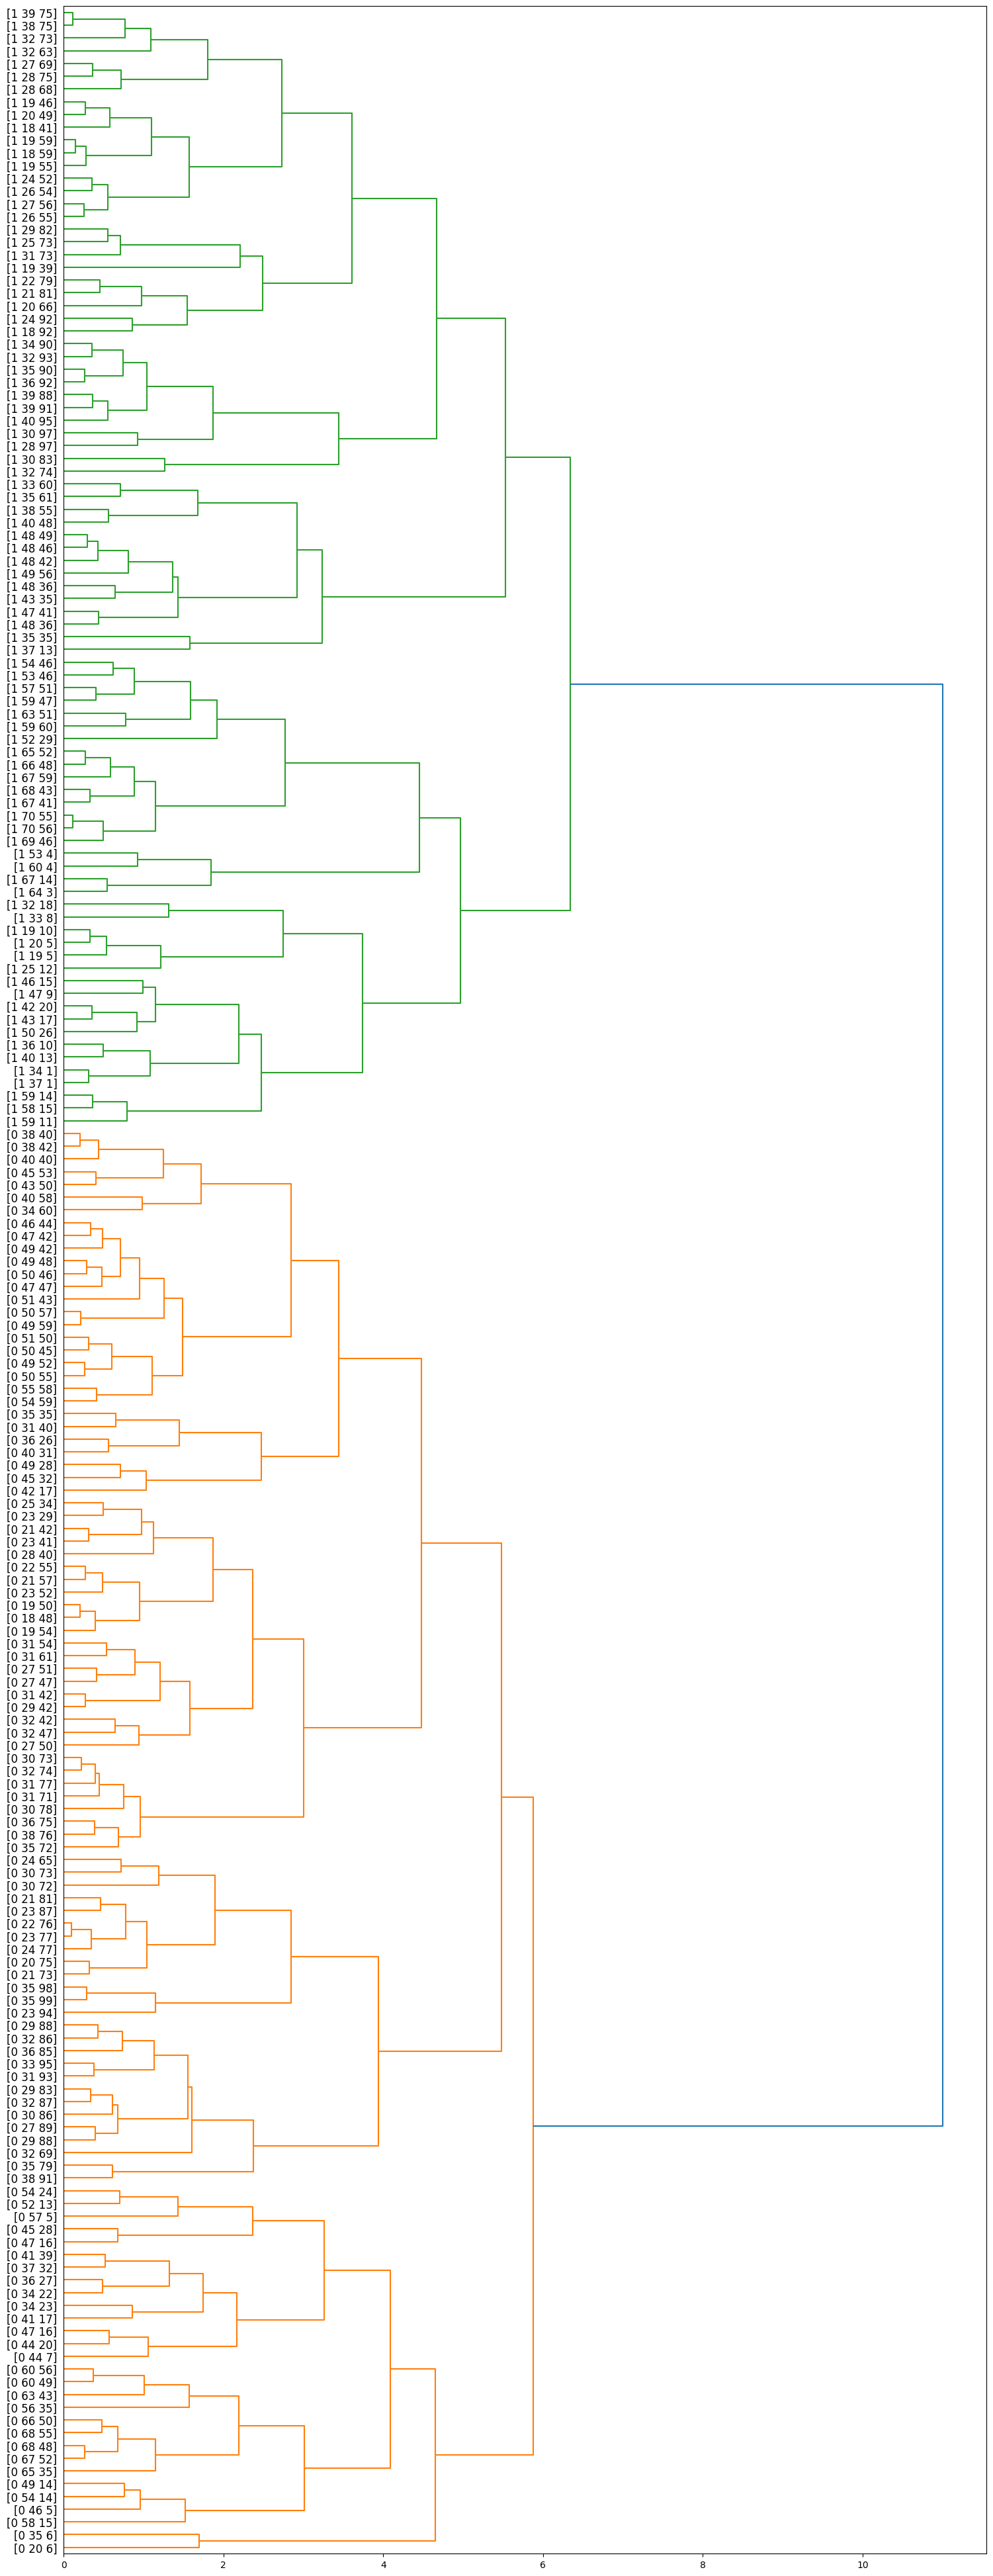

In [126]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df2['Gender'][id], df2['Age'][id], int(float(df2['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')


In [127]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)


[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [128]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_1532\3957549484.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


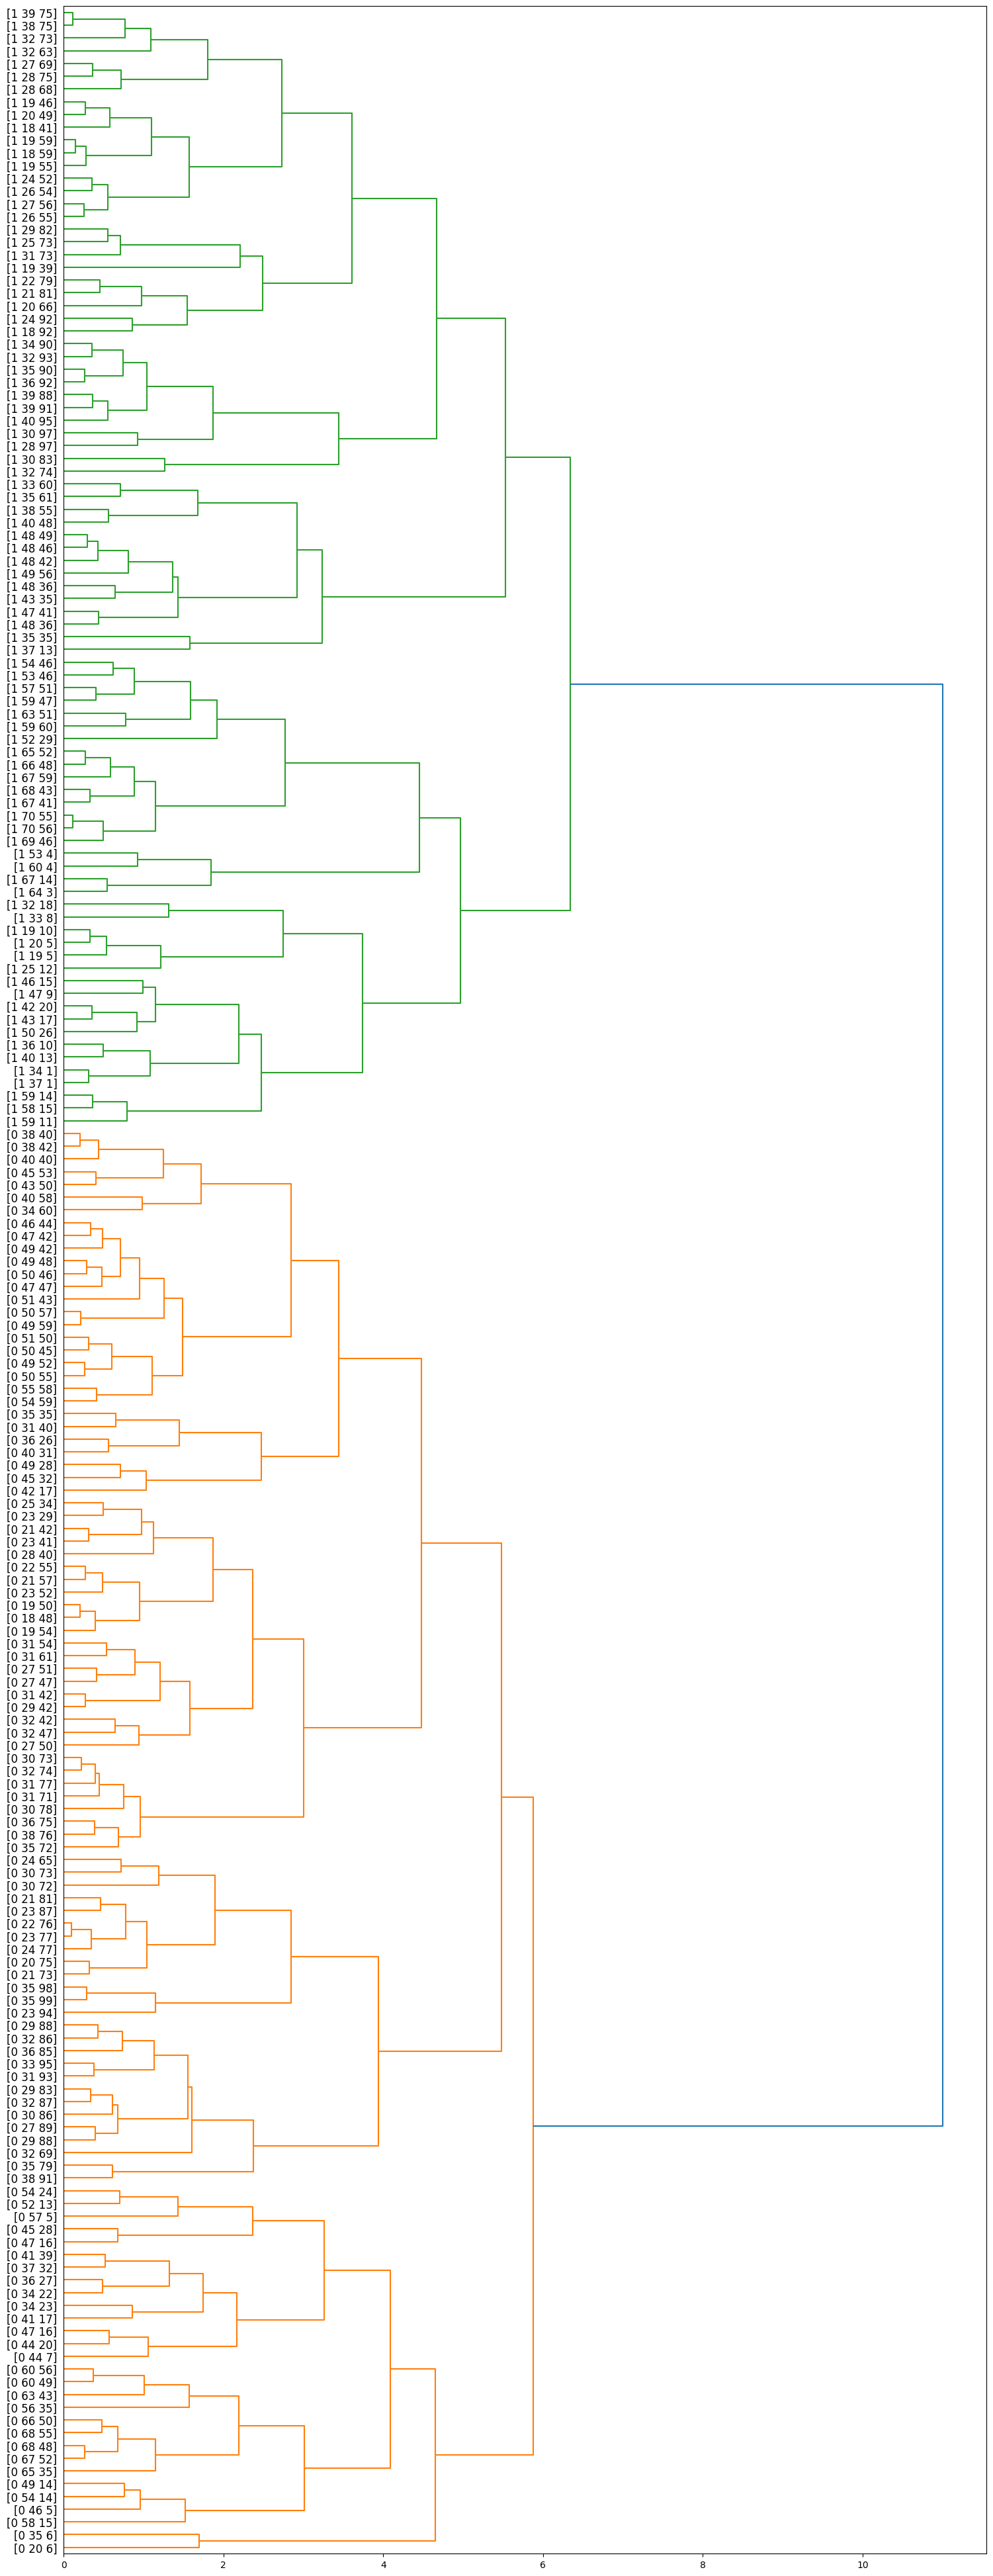

In [129]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df2['Gender'][id], df2['Age'][id], int(float(df2['Spending Score (1-100)'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')


In [130]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_


C:\Users\a.mohammadlou\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 3, 5, 2, 5, 3, 5, 0, 5, 0, 5, 3, 5, 4, 1, 2, 1, 0, 5, 4, 1,
       3, 1, 3, 1, 2, 4, 2, 5, 0, 5, 0, 1, 3, 5, 2, 5, 2, 5, 3, 1, 4, 2,
       2, 5, 2, 2, 2, 2, 2, 4, 2, 0, 2, 4, 2, 0, 2, 0, 0, 1, 3, 2, 0, 1,
       2, 3, 1, 2, 0, 2, 3, 3, 0, 1, 2, 4, 2, 2, 0, 4, 0, 2, 2, 4, 2, 2,
       2, 2, 3, 1, 4, 2, 2, 1, 2, 2, 4, 1, 2, 2, 0, 1, 4, 2, 3, 0, 0, 0,
       0, 2, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 4, 1, 0, 1, 0, 1,
       2, 2, 0, 5, 3, 1, 0, 2, 3, 1, 2, 5, 0, 1, 4, 2, 3, 1, 0, 1, 3, 2,
       3, 5, 0, 2, 0, 2, 3, 5, 0, 5, 0, 2, 0, 5, 3, 1, 0, 1, 0, 1, 3, 5,
       0, 1, 0, 1, 3, 5, 0, 5, 3, 1, 3, 1, 3, 5, 3, 5, 0, 5, 3, 5, 3, 1,
       0, 1])

In [131]:
df2['cluster_'] = agglom.labels_
df2.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,5
4,0,31,17,40,2


In [132]:
df2.rename(columns = {"Annual Income (k$)": "AI", "Spending Score (1-100)": "SS"}, inplace = True)
df2.head()


,Gender,Age,AI,SS,cluster_
0,1,19,15,39,1
1,1,21,15,81,1
2,0,20,16,6,3
3,0,23,16,77,5
4,0,31,17,40,2


C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_1532\421509217.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Gender, subset.AI, s= subset.AI*10, c=color, label='cluster'+str(label),alpha=0.5)
C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_1532\421509217.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Gender, subset.AI, s= subset.AI*10, c=color, label='cluster'+str(la

Text(0, 0.5, 'mpg')

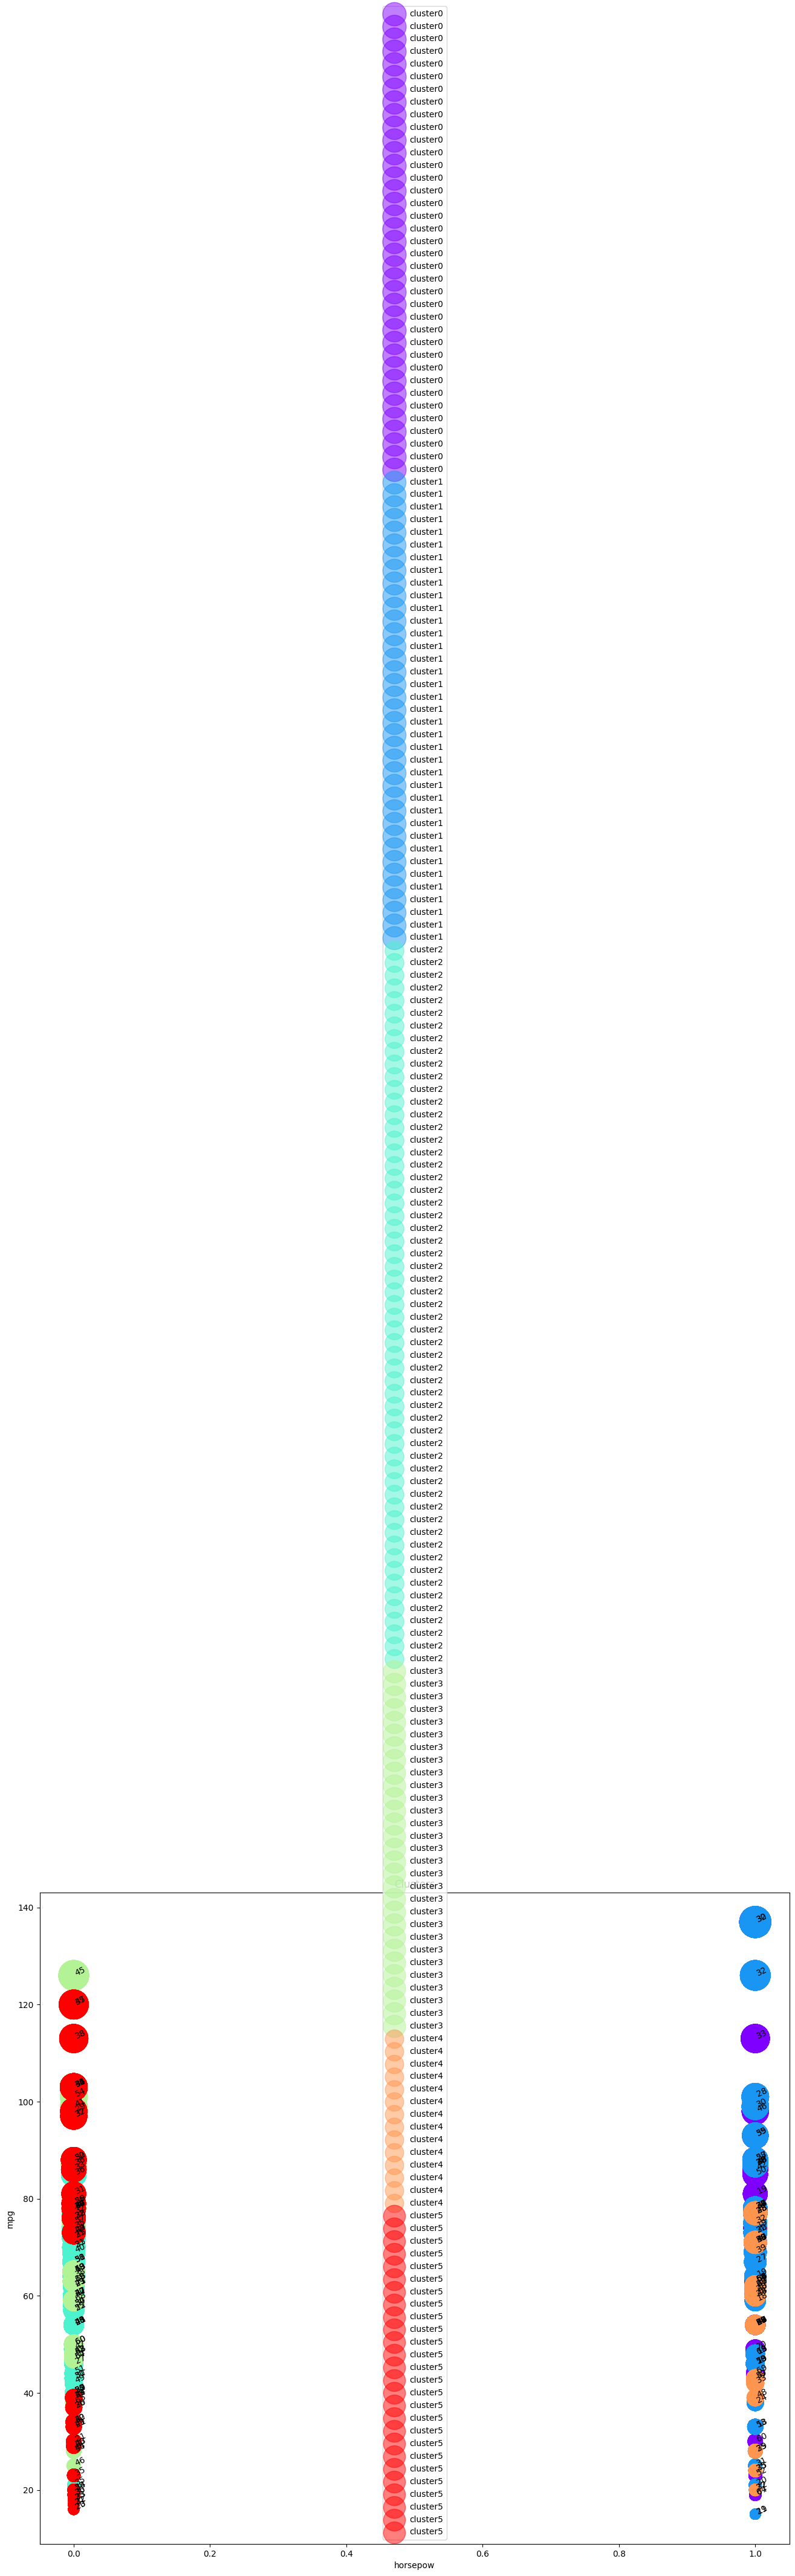

In [133]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = df2[df2.cluster_ == label]
    for i in subset.index:
      plt.text(subset.Gender[i], subset.AI[i], str(subset['Age'][i]),rotation = 25)
      plt.scatter(subset.Gender, subset.AI, s= subset.AI*10, c=color, label='cluster'+str(label),alpha=0.5)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


In [134]:
df2.groupby(['cluster_','Gender'])['cluster_'].count()


cluster_  Gender
0         1         37
1         1         37
2         0         57
3         0         29
4         1         14
5         0         26
Name: cluster_, dtype: int64

In [135]:
agg1 = df2.groupby(['cluster_', 'Gender'])['Gender'].mean()
agg1


cluster_  Gender
0         1         1.0
1         1         1.0
2         0         0.0
3         0         0.0
4         1         1.0
5         0         0.0
Name: Gender, dtype: float64

In [136]:
agg2 = df2.groupby(['cluster_', 'Gender'])['Age'].mean()
agg2


cluster_  Gender
0         1         50.864865
1         1         27.675676
2         0         36.403509
3         0         49.931034
4         1         42.642857
5         0         28.615385
Name: Age, dtype: float64

In [137]:
agg3 = df2.groupby(['cluster_', 'Gender'])['AI'].mean()
agg3


cluster_  Gender
0         1         65.702703
1         1         63.675676
2         0         55.473684
3         0         67.068966
4         1         49.214286
5         0         58.807692
Name: AI, dtype: float64

In [138]:
agg4 = df2.groupby(['cluster_', 'Gender'])['SS'].mean()
agg4


cluster_  Gender
0         1         26.081081
1         1         72.729730
2         0         49.701754
3         0         26.620690
4         1         43.785714
5         0         83.307692
Name: SS, dtype: float64

Density-Based Clustering

In [139]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline


In [140]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y


In [141]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)


In [142]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels


array([0, 1, 2, ..., 0, 2, 0])

In [143]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask


array([ True,  True,  True, ...,  True,  True,  True])

In [144]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_


3

In [145]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels


{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [146]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


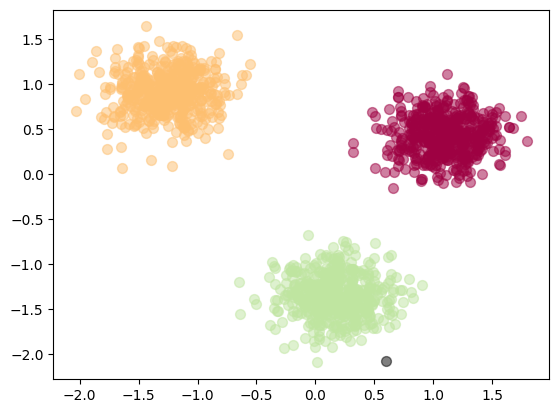

In [147]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
    